<a href="https://colab.research.google.com/github/MaheelLakshan/Image_Segmentation_Thresholding_and_Region_Growing/blob/main/Question_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import filters


Create the otsu_threshold function

In [85]:

def otsu_threshold(img):
    # Computing the histogram of pixel intensities
    hist, bins = np.histogram(img.ravel(), bins=256, range=[0,256])

    # Total number of pixels
    total_pixels = img.shape[0] * img.shape[1]

    # Initialize variables for optimal threshold and maximum between-class variance
    optimal_threshold = 0
    max_variance = 0

    # Iterate through all possible threshold values
    for threshold in range(256):
        # Calculate probabilities of pixels in foreground and background
        w0 = np.sum(hist[:threshold]) / total_pixels
        w1 = np.sum(hist[threshold:]) / total_pixels

        # Calculate mean intensities of pixels in foreground and background
        mean0 = np.sum(np.arange(threshold) * hist[:threshold]) / (np.sum(hist[:threshold]) + 1e-10)
        mean1 = np.sum(np.arange(threshold, 256) * hist[threshold:]) / (np.sum(hist[threshold:]) + 1e-10)

        # Calculate between-class variance
        between_class_variance = w0 * w1 * (mean0 - mean1) ** 2

        # Update optimal threshold if between-class variance is greater
        if between_class_variance > max_variance:
            max_variance = between_class_variance
            optimal_threshold = threshold

    # Apply optimal threshold to binarize the image
    _, binary_img = cv2.threshold(img, optimal_threshold, 255, cv2.THRESH_BINARY)

    return binary_img

Create 2 objects

In [86]:
# Create a black image
image = np.zeros((100, 100), dtype=np.uint8)

image[30:40, 30:40] = 85  # object 1
image[60:80, 60:80] = 170  # object 2

# Flatten the image to 1D array for histogram
pixels = image.flatten()

Plot histogram

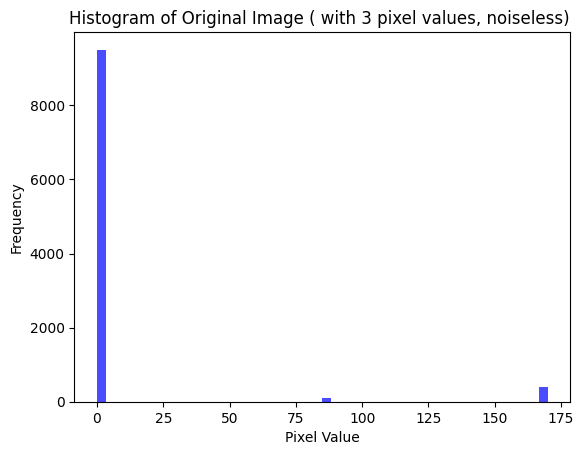

In [87]:
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Original Image ( with 3 pixel values, noiseless) ')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

Add Gaussian noise to the image

In [88]:
noise = np.random.normal(loc=0, scale=20, size=image.shape)
noisy_image = np.clip(image.astype(float) + noise, 0, 255).astype(np.uint8)

Flatten the noisy image to 1D array for histogram

In [89]:
pixels = noisy_image.flatten()

Plot histogram

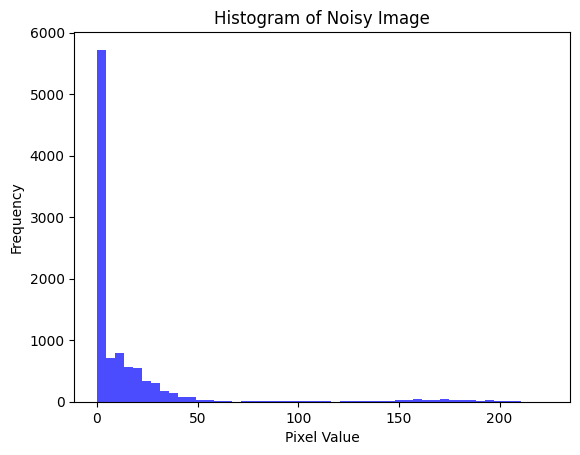

In [90]:
plt.hist(pixels, bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Noisy Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

Apply Otsu's algorithm to segment the noisy image

In [91]:
segmented_image = otsu_threshold(noisy_image)

Display the original image, noisy image, and segmented image

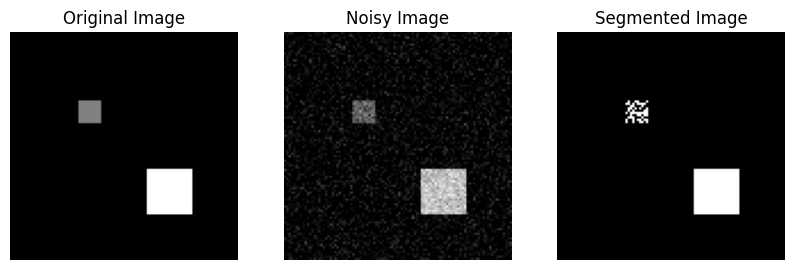

In [92]:
fig, axes = plt.subplots(ncols=3, figsize=(10, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[1].imshow(noisy_image, cmap='gray')
axes[1].set_title('Noisy Image')
axes[2].imshow(segmented_image, cmap='gray')
axes[2].set_title('Segmented Image')
for ax in axes:
    ax.axis('off')
plt.show()

Write a test

In [93]:

def test_otsu_threshold():
    assert segmented_image.shape == image.shape, "Segmented image should have same shape as original"
    assert segmented_image.dtype == np.uint8, "Segmented image should be of type np.uint8"

test_otsu_threshold()